In [7]:
import numpy as np
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [9]:
wineData = pd.read_csv('data/winequality-red.csv')
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
wineData['category'] = wineData['quality'] >= 7
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False


In [11]:
X = wineData[wineData.columns[0:11].values]
y = wineData['category'].values.astype(np.int)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                   random_state=42)
print("X train size: ", X_train.shape)
print("y train size: ", y_train.shape)
print("X test size: ", X_test.shape)
print("y test size: ", y_test.shape)

X train size:  (1119, 11)
y train size:  (1119,)
X test size:  (480, 11)
y test size:  (480,)


In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
tuned_parameters = {'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                   'max_depth': [2,3,4,5,6,7], 'min_samples_leaf': [1,10,100],
                   'random_state': [14]}
clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 10, 100], 'random_state': [14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [15]:
print("The best model is: ", clf.best_params_)
print("This model produces a mean cross-validated score (auc) of", clf.best_score_)

The best model is:  {'max_depth': 6, 'max_features': 0.6, 'min_samples_leaf': 10, 'random_state': 14}
This model produces a mean cross-validated score (auc) of 0.8580851572127516


In [16]:
from sklearn.metrics import precision_score, accuracy_score
y_true, y_pred = y_test, clf.predict(X_test)
print('precision on the evaluation set: ', precision_score(y_true, y_pred))
print('accuracy on the evaluation set: ', accuracy_score(y_true, y_pred))

precision on the evaluation set:  0.5576923076923077
accuracy on the evaluation set:  0.8729166666666667


In [17]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
phat = clf.predict_proba(X_test)[:,1]

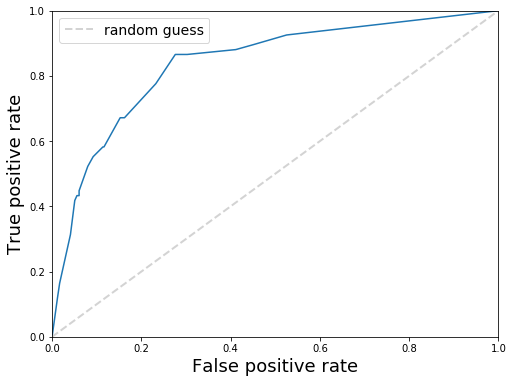

In [18]:
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, phat)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey', linestyle='--', marker='', lw=2, label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [19]:
print("AUC is: ", auc(fpr, tpr))

AUC is:  0.8382422030284413
